# Лекция №4

## Convolutions

#### Basics of convolutions

Convolutions is a technique for general signal processing. People studying electrical/electronics will tell you the near infinite sleepless nights these convolutions have given them. Entire books have been written on this topic. And the questions and theorems that need to be proved are [insurmountable]. But for computer vision, we'll just deal with some simple things.

### Definition
First, let's see the mathematical definition of convolution in discrete time domain. Later we will walk through what this equation tells us. 
(We will discuss in discrete time domain only.) 

\begin{align}
\ y[n] & = x[n] * h[n] = \sum_{k=-\infty}^\infty x[k] \cdot h[n-k]
\end{align}

where x[n] is input signal, 

h[n] is impulse response, 

and y[n] is output,

$*$ denotes convolution. 

Notice that we multiply the terms of x[k] by the terms of a time-shifted h[n] and add them up. 

The keystone of understanding convolution is lying behind impulse response and impulse decomposition.

### Impulse Function Decomposition

In order to understand the meaning of convolution, we are going to start from the concept of signal decomposition. The input signal is decomposed into simple additive components, and the system response of the input signal results in by adding the output of these components passed through the system.

In general, a signal can be decomposed as a weighted sum of basis signals. For example, in Fourier Series, any periodic signal (even rectangular pulse signal) can be represented by a sum of sine and cosine functions. But here, we use impulse (delta) functions for the basis signals, instead of sine and cosine.

Examine the following example how a signal is decomposed into a set of impulse (delta) functions. Since the impulse function, δ[n] is 1 at n=0, and zeros at n ≠ 0. x[0] can be written to 2·δ[n]. And, x[1] will be 3·δ[n-1], because δ[n-1] is 1 at n=1 and zeros at others. In same way, we can write x[2] by shifting δ[n] by 2, x[2] = 1·δ[n-2]. Therefore, the signal, x[n] can be represented by adding 3 shifted and scaled impulse functions.

<img src="img/conv_img01.png" alt="Drawing" style="width: 200px;"/> 
\begin{align}
\ x[0] = x[0] \cdot \delta[n-0] = 2 \cdot \delta[n-0]\\
\ x[1] = x[1] \cdot \delta[n-1] = 3 \cdot \delta[n-1]\\
\ x[2] = x[2] \cdot \delta[n-2] = 1 \cdot \delta[n-2]\\
\end{align}

In general, a signal can be written as sum of scaled and shifted delta functions;

\begin{align}
\ x[n] = \sum_{k=-\infty}^\infty x[k] \cdot \delta[n-k] = x[0] \cdot \delta[n-0] + x[1] \cdot \delta[n-1] + x[2] \cdot \delta[n-2]\\
\end{align

### Impulse Response

Impulse response is the output of a system resulting from an impulse function as input. 
And it is denoted as h[n]. Вся волшебство именно тут. Для вас это перестанет быть магией на 2-3 курсе инстиута. Ну, или не перестанет...


<table><tr>
    <td> <img src="img/conv_img02.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

### Convolution in 2D

2D convolution is just extension of previous 1D convolution by convolving both horizontal and vertical directions in 2 dimensional spatial domain. Convolution is frequently used for image processing, such as smoothing, sharpening, and edge detection of images. 

The impulse (delta) function is also in 2D space, so δ[m, n] has 1 where m and n is zero and zeros at m,n ≠ 0. The impulse response in 2D is usually called "kernel" or "filter" in image processing. 


<table><tr>
    <td> <img src="img/conv2d_delta.jpg" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="img/conv_img10.png" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

And, the output of linear and time invariant system can be written by convolution of input signal x[m, n], and impulse response, h[m, n]; 

\begin{align}
\ y[m,n] & = x[m,n] * h[m,n] = \sum_{j=-\infty}^\infty \sum_{i=-\infty}^\infty x[i,j] \cdot h[m-i,n-j]
\end{align}


Examine an example to clarify how to convolve in 2D space. 
Let's say that the size of impulse response (kernel) is 3x3, and it's values are a, b, c, d,... 

Notice the origin (0,0) is located in the center of the kernel. 

Let's pick a simplest sample and compute convolution, for instance, the output at (1, 1) will be;
<img src="img/conv_img11.png" alt="Drawing" style="width: 200px;"/>

\begin{align}
\ y[1,1] & = \sum_{j=0}^2 \sum_{i=0}^2 x[i,j] \cdot h[1-i,1-j]  \\ &
\ = x[0,0] \cdot h[1,1] + x[1,0] \cdot h[0,1] + x[2,0] \cdot h[-1,1] \\ &
\ + x[0,1] \cdot h[1,0] + x[1,1] \cdot h[0,0] + x[2,1] \cdot h[-1,0] \\ &
\ + x[0,2] \cdot h[1,-1] + x[1,2] \cdot h[0,-1] + x[2,2] \cdot h[-1,-1] \\&
\end{align}


Exercise a little more about 2D convolution with an another example. Suppose we have 3x3 input and 3x3 kernel matrices as follow.

Input | Kernel | Output
-|-|-
<img src="img/conv_img15.png" alt="Drawing" style="width: 200px;"/> | <img src="img/conv_img16.png" alt="Drawing" style="width: 200px;"/> | <img src="img/conv_img17.png" alt="Drawing" style="width: 200px;"/>

The ouput at (1, 1) for this example will be:
\begin{align}
\ y[1,1] & = \sum_{j=0}^2 \sum_{i=0}^2 x[i,j] \cdot h[1-i,1-j]  \\ &
\ = x[0,0] \cdot h[1,1] + x[1,0] \cdot h[0,1] + x[2,0] \cdot h[-1,1] \\ &
\ + x[0,1] \cdot h[1,0] + x[1,1] \cdot h[0,0] + x[2,1] \cdot h[-1,0] \\ &
\ + x[0,2] \cdot h[1,-1] + x[1,2] \cdot h[0,-1] + x[2,2] \cdot h[-1,-1] \\&
\ = 1 \cdot 1 + 2 \cdot 2 + 3 \cdot 1 \\ &
\ + 4 \cdot 0 + 5 \cdot 0 + 6 \cdot 0 \\ &
\ + 7 \cdot (-1) + 8 \cdot (-2) + 9 \cdot (-1) \\ &
\ = -24 \\
\end{align}

## 2D Convolution  (Image Filtering)

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

OpenCV provides a function $cv2.filter2D()$ to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

$$
\begin{equation*}
\ K = \frac{1}{25} \begin{vmatrix}
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 
\end{vmatrix}
\end{equation*}
$$

Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:

In [8]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

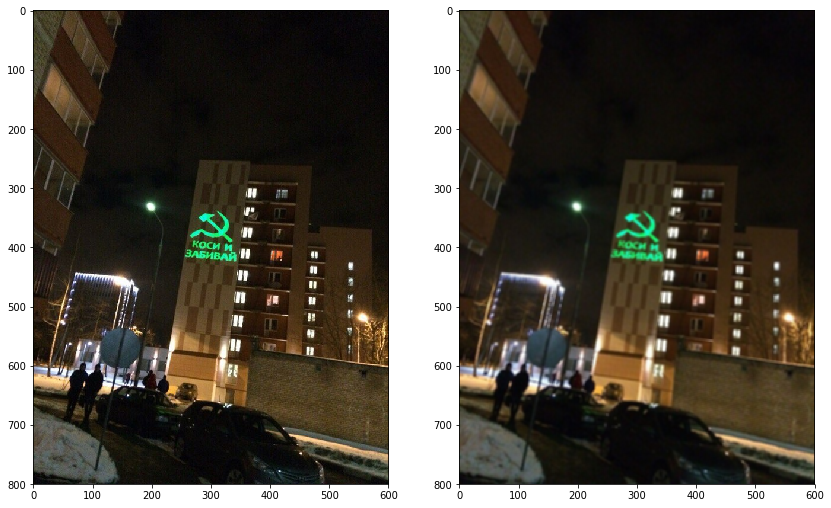

In [10]:
img = cv2.imread('img/8_ka.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5), dtype=np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs
ax1.imshow(img)
ax2.imshow(dst);

## Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn't blur the edges too). OpenCV provides mainly four types of blurring techniques.

### 1. Averaging
This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function $cv2.blur()$ or $cv2.boxFilter()$. Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:

$$
\begin{equation*}
\ K = \frac{1}{9} \begin{vmatrix}
1 & \ 1 & \ 1 \\ 
1 & \ 1 & \ 1 \\ 
1 & \ 1 & \ 1 
\end{vmatrix}
\end{equation*}
$$

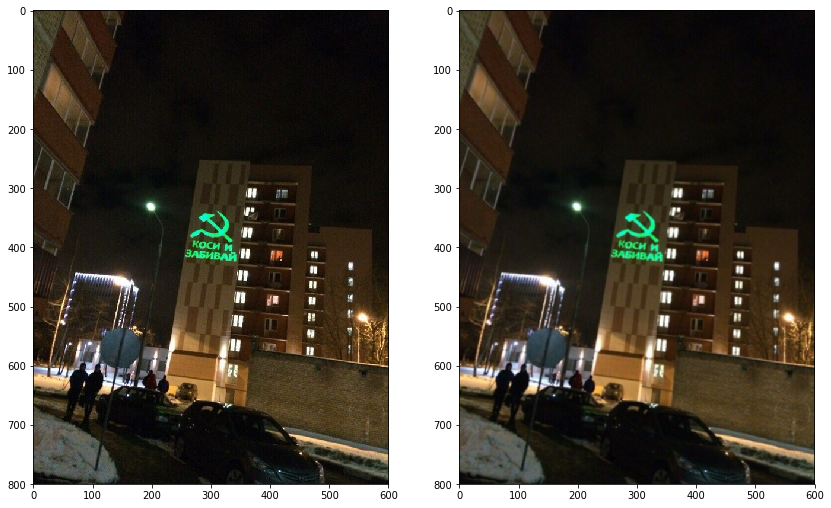

In [11]:
blur = cv2.blur(img,(3, 3))

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs
ax1.imshow(img)
ax2.imshow(blur);

### 2. Gaussian Blurring
In this, instead of box filter, gaussian kernel is used. It is done with the function, $cv2.GaussianBlur()$. We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, $cv2.getGaussianKernel()$.

The above code can be modified for Gaussian blurring:

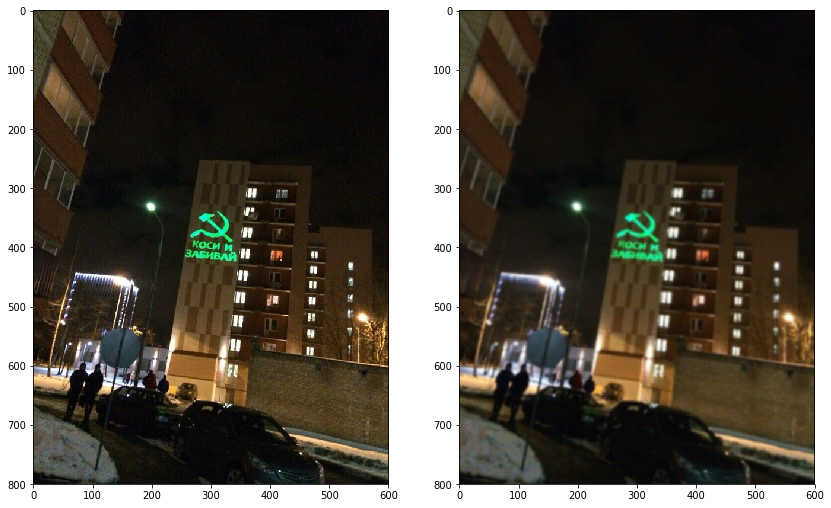

In [12]:
blur = cv2.GaussianBlur(img,(9,9),0)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs
ax1.imshow(img)
ax2.imshow(blur);

### 3. Median Blurring

Here, the function __cv2.medianBlur()__ takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blur. Check the result:

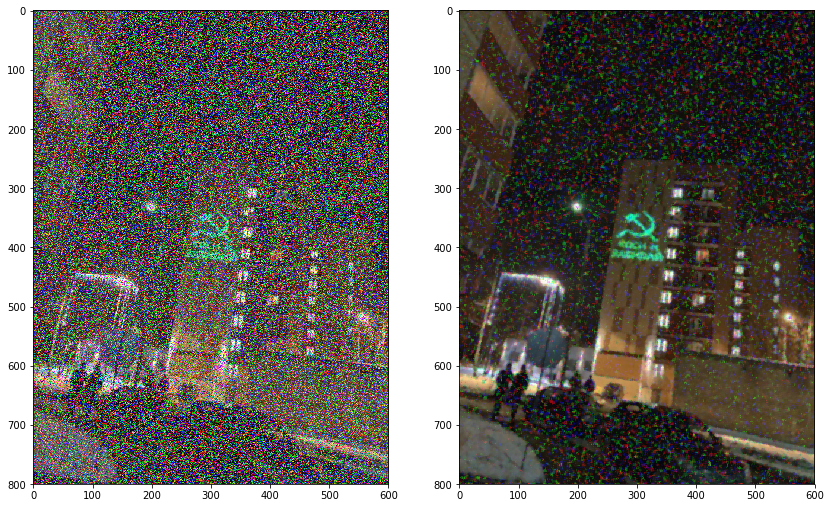

In [13]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

median = cv2.medianBlur(noise_img, 5)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs
ax1.imshow(noise_img)
ax2.imshow(median);

### 4. Bilateral Filtering

__cv2.bilateralFilter()__ is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost same intensity. It doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

Below samples shows use bilateral filter (For details on arguments, visit docs).

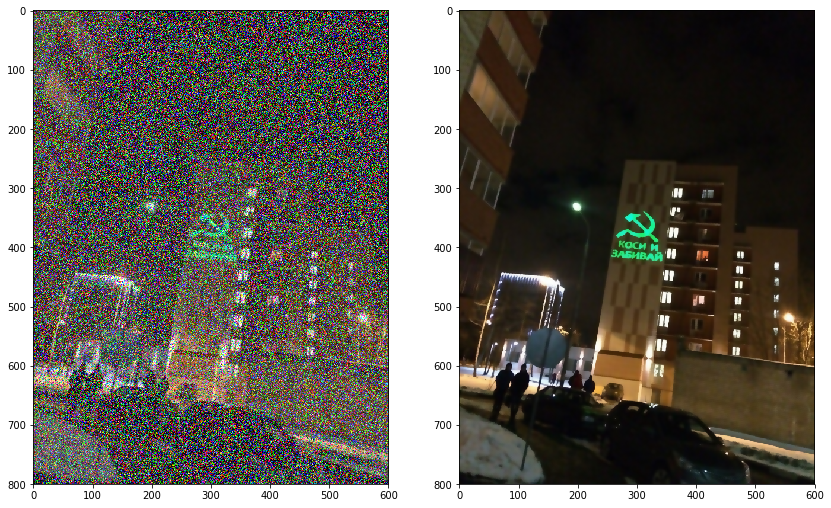

In [14]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

blur = cv2.bilateralFilter(img,9,75,75)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs
ax1.imshow(noise_img)
ax2.imshow(blur);

## Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

<img src="img/j.png" alt="Drawing" style="width: 100px;"/>

__Эрозия__ (размывание/сужение) изображения обычно используется для избавления от случайных вкраплений на изображении. Идея состоит в том, что вкрапления при размывании устранятся, тогда как крупные и соответсвенно более визуально-значимые регионы остаются.

__Растягивание__ (расширение) же, по идее, так же должно устранять шум и способствовать объединению областей изображения, которые были разделены шумом, тенями, etc.
Применение же небольшого растягивания должно сплавить эти области в одну.

Морфологические операции, чаще всего, применяются над двоичными изображениями, которые получаются после порогового преобразования (thresholding).

### 1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

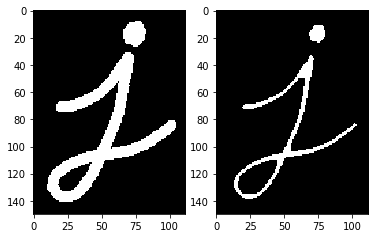

In [15]:
import cv2
import numpy as np

img = cv2.imread('img/j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(img, cmap='gray')
ax2.imshow(erosion, cmap='gray');

### 2. Dilation
It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

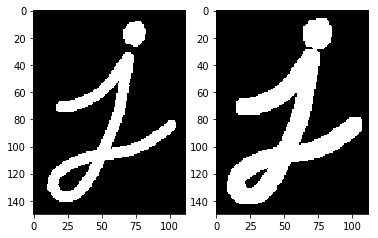

In [16]:
dilation = cv2.dilate(img,kernel,iterations = 1)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(img, cmap='gray')
ax2.imshow(dilation, cmap='gray');

### 3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, __cv2.morphologyEx()__

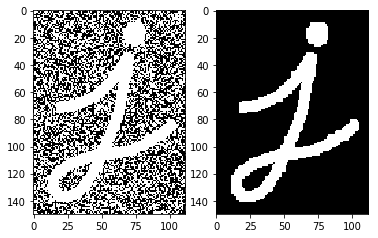

In [17]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.ones(noise_img.shape) * 255
noise_img[mask] = r[mask]

opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(noise_img, cmap='gray')
ax2.imshow(opening, cmap='gray');

### 4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

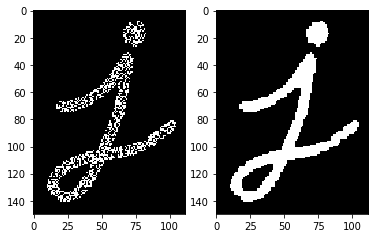

In [18]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.zeros(noise_img.shape)
noise_img[mask] = r[mask]

opening = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(noise_img, cmap='gray')
ax2.imshow(opening, cmap='gray');

### 5. Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

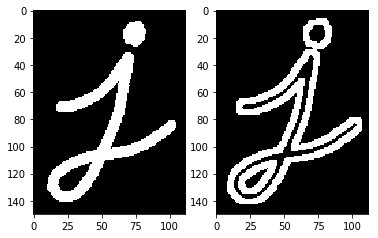

In [19]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(img, cmap='gray')
ax2.imshow(gradient, cmap='gray');